In [ ]:
def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

In [ ]:
def f1(x,a,b):
  return a*x+b

#PARTE I

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1d2iDB1bcTrnOd8lmK9awACm-C5UsTH00BU3DNBA-0sA/edit#gid=602315810')
worksheet=wb.worksheet('PARTE I')
rows = worksheet.get_all_values()
df=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
df.columns = df.iloc[1]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[1:2]
df = df.iloc[2:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1,365Vr [V],365I [pA],405Vr [V],405I [pA],436Vr[V],436I [pA],546Vr [V],546I [pA],578Vr [V],578I [pA]
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.3,0.00,96.1
3,0.00,94.5,0.00,96.7,0.00,92.8,-0.01,96.2,0.00,96.3
4,-0.02,93.0,0.00,96.6,-0.01,92.4,-0.01,93.9,-0.01,92.5
5,-0.04,91.0,-0.01,95.9,-0.02,90.6,-0.02,92.7,-0.03,90.7
6,-0.04,90.2,-0.01,95.2,-0.03,89.3,-0.03,91.3,-0.03,87.3


In [ ]:
nombres=df.columns[0:10]
for name in nombres:
  df[name]= pd.to_numeric(df[name])

In [ ]:
df.columns[0:10]

Index(['365Vr [V]', '365I [pA]', '405Vr [V]', '405I [pA]', '436Vr[V]',
       '436I [pA]', '546Vr [V]', '546I [pA]', '578Vr [V]', '578I [pA]'],
      dtype='object', name=1)

## 365

Text(0.5, 1.0, ' I vs V ')

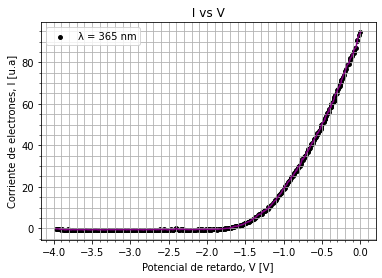

In [ ]:
valx1=df.loc[3:328,"365Vr [V]"]
valy1=df.loc[3:328,"365I [pA]"]
x1=valx1.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y1=valy1.values
plt.scatter(x1,y1,label="λ = 365 nm",color="black",s=15)
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(x1, y1,color="purple")

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Intervalo de corriente 0')

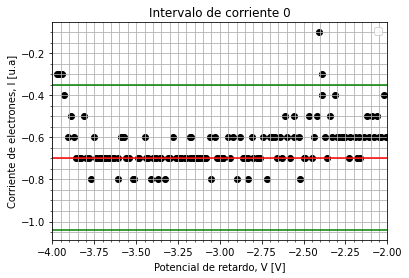

In [ ]:
valx2=df.loc[195:328,"365Vr [V]"] #[-1.99,-3.97]
valy2=df.loc[195:328,"365I [pA]"]
x2=valx2.values 
y2=valy2.values
#hlines
plt.hlines(y=-0.7, xmin=-4.0, xmax=-2.0, color='red')
plt.hlines(y=-1.04, xmin=-4.0, xmax=-2.0, color='green')
plt.hlines(y=-0.35, xmin=-4.0, xmax=-2.0, color='green')

plt.scatter(x2,y2,color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")

plt.xlim([-4, -2])
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
dev1 = statistics.stdev(y2)
med1 = statistics.median(y2)
print("La desviación estandar en el metodo 1 es: ", dev1)
print("La media en el metodo 1 es: ", med1)

La desviación estandar en el metodo 1 es:  0.115553441803748
La media en el metodo 1 es:  -0.7


In [ ]:
print(np.std(y2))
print(np.mean(y2))

0.1151214648083162
-0.6380597014925372


In [ ]:
medinf = med1 - (3*dev1)
medsup = med1 + (3*dev1)
print(medinf)
print(medsup)

-1.0466603254112439
-0.3533396745887559


Text(0.5, 1.0, 'Intervalo Vo')

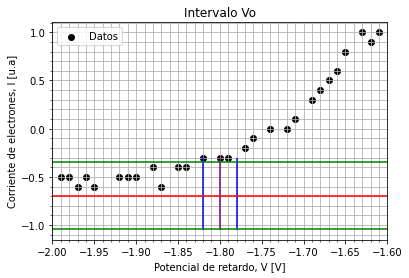

In [ ]:
valx3=df.loc[167:195,"365Vr [V]"]
valy3=df.loc[167:195,"365I [pA]"]
x3=valx3.values 
y3=valy3.values
xmin3 = -2.0
xmax3 = -1.6
ymin3 = -1.05
ymax3 = -0.3

#vlines
plt.vlines(x=-1.80, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-1.82, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-1.78, ymin=ymin3, ymax=ymax3, color='blue')

#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-1.04, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.35, xmin=xmin3, xmax=xmax3, color='green')

plt.minorticks_on()
plt.grid(b=True,which="both")

plt.scatter(x3,y3,label="Datos",color="black")
plt.xlim([xmin3, xmax3])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo Vo")

In [ ]:
Voinf = -1.82
Vosup = -1.79
VDIF = (Voinf + Vosup)/2
RAN = (Voinf - Vosup)/2
print(VDIF)
print(RAN)

-1.8050000000000002
-0.015000000000000013


###Método 2:
Minimos cuadrados para la parte creciente y se busca el punto de intersección con las lineas promedio.

Text(0.5, 1.0, 'I vs V')

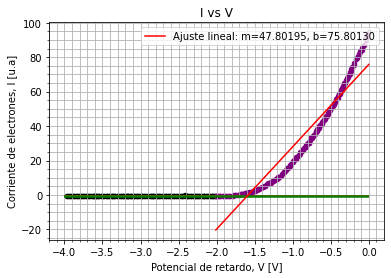

In [ ]:
#Parte CRECIENTE
val_365_x2=df.loc[3:195,"365Vr [V]"]
val_365_y2=df.loc[3:195,"365I [pA]"]

x2_365 = val_365_x2.values
y2_365 = val_365_y2.values

#x2,y2 son las parte de V0
#hlines
plt.hlines(y=-0.7, xmin=-4.0, xmax=0.0, color='red')
plt.hlines(y=-1.04, xmin=-4.0, xmax=0.0, color='green')
plt.hlines(y=-0.35, xmin=-4.0, xmax=0.0, color='green')

plt.scatter(x2,y2,color="black",s=20)
plt.scatter(x2_365,y2_365,color="purple",s=20)

plt.minorticks_on()
plt.grid(b=True,which="both")

#Regresión lineal
popt_2_365, pcov = curve_fit(f1, x2_365, y2_365)
plt.plot(x2_365, f1(x2_365, *popt_2_365), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(popt_2_365))


plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("I vs V")
#plt.title("Intervalo de corriente 0")

In [ ]:
popt_2_365[0]

47.80194890885262

In [ ]:
#Incertidumbre de los parametros
print(ERROR(x2_365,y2_365,popt_2_365[0],popt_2_365[1])) 

(1.0223714682287486, 1.0962749276135182)


Text(0.5, 1.0, 'Intervalo de corriente 0')

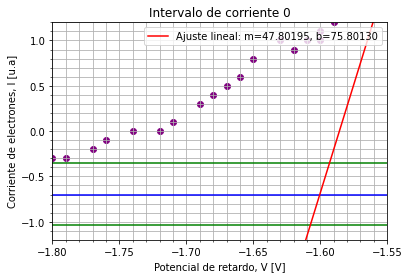

In [ ]:
#x2,y2 son las parte de V0
#hlines
plt.hlines(y=-0.7, xmin=-4.0, xmax=0.0, color='blue')
plt.hlines(y=-1.04, xmin=-4.0, xmax=0.0, color='green')
plt.hlines(y=-0.35, xmin=-4.0, xmax=0.0, color='green')

plt.scatter(x2,y2,color="black")
plt.scatter(x2_365,y2_365,color="purple")

plt.minorticks_on()
plt.grid(b=True,which="both")

#Regresión lineal
popt_2_365, pcov = curve_fit(f1, x2_365, y2_365)
plt.plot(x2_365, f1(x2_365, *popt_2_365), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(popt_2_365))

plt.xlim([-1.8, -1.55])
plt.ylim([-1.2, 1.2])
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
V0_2_inf = (popt_2_365[1]+0.35)/popt_2_365[0]
V0_2_sup = (popt_2_365[1]+1.04)/popt_2_365[0]
print("V0_2_inf= ", V0_2_inf)
print("V0_2_sup= ", V0_2_sup)
print("V_0", (V0_2_inf +V0_2_sup)/2)

V0_2_inf=  1.5930584926526867
V0_2_sup=  1.6074930505682163
V_0 1.6002757716104514


### Método 3: Derivada Numerica

[f(x + h ) + f(x) ] / h


In [ ]:
print(np.size(x1))
print(x1[5])

326
-0.07


In [ ]:
xnew365 = []
ynew365 = []
for i in range(325):
  if (x1[i] == x1[i +1]):
    continue
  f = (y1[i + 1] - y1[i])/(x1[i +1] - x1[i])
  ynew365.append(f)
  xnew365.append(x1[i])


Text(0.5, 1.0, 'Curva (dI/dV) vs V')

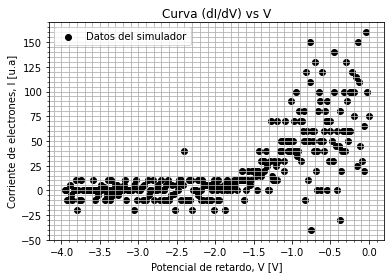

In [ ]:
plt.scatter(xnew365,ynew365,label="Datos del simulador",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
#plt.plot(xnew365,ynew365)

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Curva (dI/dV) vs V")

Text(0, 0.5, 'Corriente de electrones, I [u.a]')

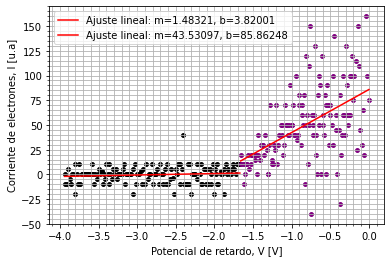

In [ ]:
xs_365 = 140
y_new365 = np.array(ynew365[xs_365:288])
x_new365 = np.array(xnew365[xs_365:288])
y3_new365 = np.array(ynew365[:xs_365])
x3_new365 = np.array(xnew365[:xs_365])
plt.scatter(x_new365,y_new365,color="black",s=15)
plt.scatter(x3_new365,y3_new365,color="purple",s=15)
plt.minorticks_on()
plt.grid(b=True,which="both")

popt_365_1, pcov = curve_fit(f1, x_new365, y_new365)
plt.plot(x_new365, f1(x_new365, *popt_365_1), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(popt_365_1))

popt_365_2, pcov = curve_fit(f1, x3_new365, y3_new365)
plt.plot(x3_new365, f1(x3_new365, *popt_365_2), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(popt_365_2))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
print(np.std(y_new365))
print(np.mean(y_new365))

8.282862440128662
-0.32657657657657524


In [ ]:
#Hallar V0
v0_365 = -(popt_365_2[1]-popt_365_1[1])/(popt_365_2[0]-popt_365_1[0])
print(v0_365)

-1.9511736799264485


In [ ]:
#Incertidumbre de los parametros
print(ERROR(x_new365,y_new365,popt_365_1[0],popt_365_1[1])) 
print(ERROR(x3_new365,y3_new365,popt_365_2[0],popt_365_2[1])) 

(0.9743071745061153, 2.782396393664968)
(5.885348586577341, 5.570544283866741)


##405

###Metodo 1

Text(0.5, 1.0, ' I vs V ')

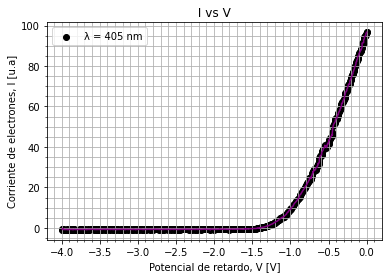

In [ ]:
valx1_405=df.loc[3:480,"405Vr [V]"]
valy1_405=df.loc[3:480,"405I [pA]"]
x1_405=valx1_405.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y1_405=valy1_405.values
plt.scatter(x1_405,y1_405,label="λ = 405 nm",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(x1_405, y1_405,color="purple")

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

In [ ]:
df.columns[0:10]

Index(['365Vr [V]', '365I [pA]', '405Vr [V]', '405I [pA]', '436Vr[V]',
       '436I [pA]', '546Vr [V]', '546I [pA]', '578Vr [V]', '578I [pA]'],
      dtype='object', name=1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Intervalo de corriente 0')

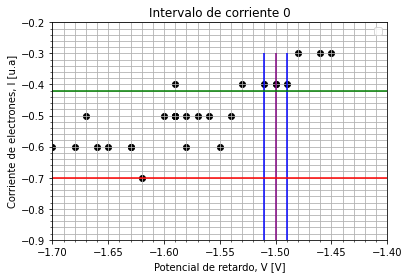

In [ ]:
valx2_405=df.loc[230:480,"405Vr [V]"] #[-1.99,-3.97]
valy2_405=df.loc[230:480,"405I [pA]"]
x2_405=valx2_405.values 
y2_405=valy2_405.values

xmin3 = -2.0
xmax3 = -1.0
ymin3 = -1.05
ymax3 = -0.3
#vlines
plt.vlines(x=-1.50, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-1.51, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-1.49, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-0.97, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.42, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_405,y2_405,color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")

plt.xlim([-1.7, -1.4])
plt.ylim([-0.9, -0.2])
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
dev_405 = statistics.stdev(y2_405)
med_405 = statistics.median(y2_405)
print("La desviación estandar en el metodo 1 es: ", dev_405)
print("La media en el metodo 1 es: ", med_405)

medinf_405 = med_405 - (3*dev_405)
medsup_405 = med_405 + (3*dev_405)
print("El corte de 0 inferior es: ", medinf_405)
print("El corte de 0 superior es: ",medsup_405)

La desviación estandar en el metodo 1 es:  0.10350972393068765
La media en el metodo 1 es:  -0.7
El corte de 0 inferior es:  -1.0105291717920628
El corte de 0 superior es:  -0.389470828207937


Mirando los datos de excel podemos suponer que V0= -1.50

###Método 2

Text(0.5, 1.0, 'Intervalo de corriente 0')

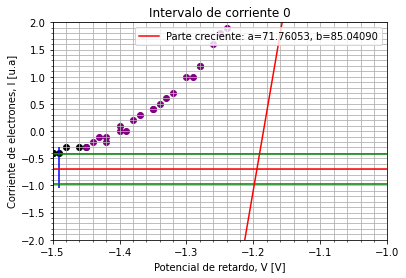

In [ ]:
#Parte CRECIENTE
val_405_x2=df.loc[3:230,"405Vr [V]"]
val_405_y2=df.loc[3:230,"405I [pA]"]

y3_405 = val_405_y2.values
x3_405 = val_405_x2.values

#y2_405,x2_405 son las parte de V0

xmin3 = -2.0
xmax3 = -1.0
ymin3 = -1.05
ymax3 = -0.3
#vlines
plt.vlines(x=-1.50, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-1.51, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-1.49, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-0.97, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.42, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_405,y2_405,color="black")
plt.scatter(x3_405,y3_405,color="purple")

plt.minorticks_on()
plt.grid(b=True,which="both")

#Regresión lineal
popt3_405, pcov = curve_fit(f1, x3_405, y3_405)
plt.plot(x3_405, f1(x3_405, *popt3_405), 'r-', label='Parte creciente: a=%5.5f, b=%5.5f' % tuple(popt3_405))

#ZOOM
plt.xlim([-1.5, -1.0])
plt.ylim([-2, 2])

plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
print(ERROR(x3_405,y3_405,popt3_405[0],popt3_405[1])) 
V0_2_inf = (popt3_405[1]-medinf_405)/popt3_405[0]
V0_2_sup = (popt3_405[1]-medsup_405)/popt3_405[0]
print("V0_2_inf= ", V0_2_inf)
print("V0_2_sup= ", V0_2_sup)
print("V0= ", (V0_2_sup + V0_2_inf)/2)

(1.1127794102536308, 0.8254122922995171)
V0_2_inf=  1.1991470127149326
V0_2_sup=  1.1904924179090892
V0=  1.1948197153120108


###Metodo 3

In [ ]:
xnew405 = []
ynew405 = []
for i in range(477):
  if (x1_405[i] == x1_405[i +1]):
    continue
  f = (y1_405[i + 1] - y1_405[i])/(x1_405[i +1] - x1_405[i])
  ynew405.append(f)
  xnew405.append(x1_405[i])

Text(0.5, 1.0, 'Curva I')

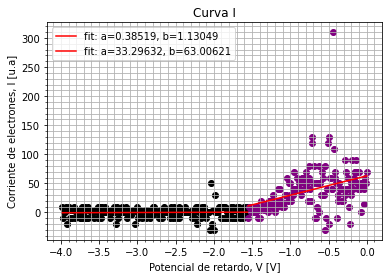

In [ ]:
xs_405 = 147
y_new405 = np.array(ynew405[xs_405:477])
x_new405 = np.array(xnew405[xs_405:477])
y3_new405 = np.array(ynew405[:xs_405])
x3_new405 = np.array(xnew405[:xs_405])
plt.scatter(x_new405,y_new405,color="black")
plt.scatter(x3_new405,y3_new405,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

popt_405_1, pcov = curve_fit(f1, x_new405, y_new405)
plt.plot(x_new405, f1(x_new405, *popt_405_1), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_405_1))

popt_405_2, pcov = curve_fit(f1, x3_new405, y3_new405)
plt.plot(x3_new405, f1(x3_new405, *popt_405_2), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_405_2))

#Zoom
#plt.xlim([-1.7, -1.0])
#plt.ylim([-10, 40])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Curva I")

In [ ]:
#Hallar V0
v0_405 = -(popt_405_2[1]-popt_405_1[1])/(popt_405_2[0]-popt_405_1[0])
print(v0_405)

-1.8800848828707442


In [ ]:
print(ERROR(x_new405,y_new405,popt_405_1[0],popt_405_1[1])) 
print(ERROR(x3_new405,y3_new405,popt_405_1[0],popt_405_1[1])) 

(0.8583884577000607, 2.3776133217218502)
(10.985847412551635, 8.969982133772984)


##436

###Metodo 1

Text(0.5, 1.0, ' I vs V ')

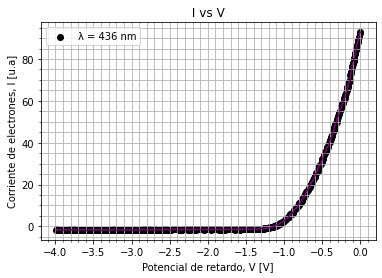

In [ ]:
valx1_436=df.loc[3:310,"436Vr[V]"]
valy1_436=df.loc[3:310,"436I [pA]"]
x1_436=valx1_436.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y1_436=valy1_436.values
plt.scatter(x1_436,y1_436,label="λ = 436 nm",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(x1_436, y1_436,color="purple")

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Intervalo de corriente 0')

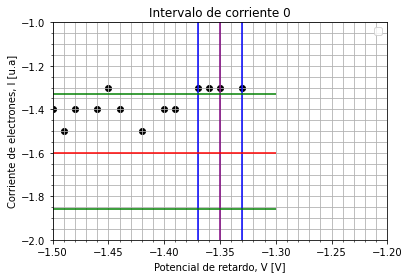

In [ ]:
valx2_436=df.loc[147:310,"436Vr[V]"] #[-1.99,-3.97]
valy2_436=df.loc[147:310,"436I [pA]"]
x2_436=valx2_436.values 
y2_436=valy2_436.values

xmin3 = -4.0
xmax3 = -1.3
ymin3 = -2.0
ymax3 = -1.0
#vlines
plt.vlines(x=-1.35, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-1.33, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-1.37, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-1.6, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-1.86, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-1.33, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_436,y2_436,color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")

plt.xlim([-1.5, -1.2])
plt.ylim([-2, -1.0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
dev_436 = statistics.stdev(y2_436)
med_436 = statistics.median(y2_436)
print("La desviación estandar en el metodo 1 es: ", dev_436)
print("La media en el metodo 1 es: ", med_436)

medinf_436 = med_436 - (3*dev_436)
medsup_436 = med_436 + (3*dev_436)
print("El corte de 0 inferior es: ", medinf_436)
print("El corte de 0 superior es: ",medsup_436)

La desviación estandar en el metodo 1 es:  0.09363237046578683
La media en el metodo 1 es:  -1.6
El corte de 0 inferior es:  -1.8808971113973607
El corte de 0 superior es:  -1.3191028886026395


###Metodo 2

Text(0.5, 1.0, 'Intervalo de corriente 0')

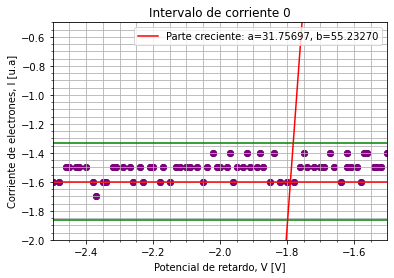

In [ ]:
#Parte CRECIENTE
val_436_x2=df.loc[3:230,"436Vr[V]"]
val_436_y2=df.loc[3:230,"436I [pA]"]

y3_436 = val_436_y2.values
x3_436 = val_436_x2.values

#y2_436,x2_436 son las parte de V0

xmin3 = -4.0
xmax3 = -1.3
ymin3 = -2.0
ymax3 = -1.0
#vlines
plt.vlines(x=-1.33, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-1.35, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-1.37, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-1.6, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-1.86, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-1.33, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_436,y2_436,color="black")
plt.scatter(x2_436,y2_436,color="purple")

plt.minorticks_on()
plt.grid(b=True,which="both")

#Regresión lineal
popt3_436, pcov = curve_fit(f1, x3_436, y3_436)
plt.plot(x3_436, f1(x3_436, *popt3_436), 'r-', label='Parte creciente: a=%5.5f, b=%5.5f' % tuple(popt3_436))

#ZOOM
plt.xlim([-2.5, -1.5])
plt.ylim([-2, -0.5])

plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
#Incertidumbre de los parametros
print(ERROR(x3_436,y3_436,popt3_436[0],popt3_436[1])) 
#Metodo 2
V0_2_inf = (popt3_436[1]-medinf_436)/popt3_436[0]
V0_2_sup = (popt3_436[1]-medsup_436)/popt3_436[0]
print("V0_2_inf= ", V0_2_inf)
print("V0_2_sup= ", V0_2_sup)
print("V0= ", (V0_2_sup+V0_2_inf)/2)

(1.4062145031477449, 1.8289852676773086)
V0_2_inf=  1.7984590274839496
V0_2_sup=  1.7807686022659222
V0=  1.7896138148749359


###Metodo 3

In [ ]:
xnew436 = []
ynew436 = []
for i in range(307):
  if (x1_436[i] == x1_436[i +1]):
    continue
  f = (y1_436[i + 1] - y1_436[i])/(x1_436[i +1] - x1_436[i])
  ynew436.append(f)
  xnew436.append(x1_436[i])

Text(0.5, 1.0, 'Curva I')

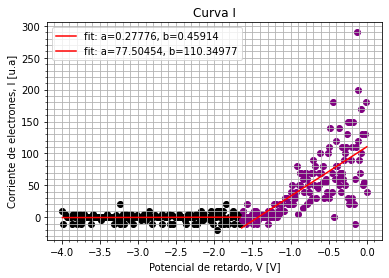

In [ ]:
xs_436 = 140
y_new436 = np.array(ynew436[xs_436:477])
x_new436 = np.array(xnew436[xs_436:477])
y3_new436 = np.array(ynew436[:xs_436])
x3_new436 = np.array(xnew436[:xs_436])
plt.scatter(x_new436,y_new436,color="black")
plt.scatter(x3_new436,y3_new436,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

popt_436_1, pcov = curve_fit(f1, x_new436, y_new436)
plt.plot(x_new436, f1(x_new436, *popt_436_1), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_436_1))

popt_436_2, pcov = curve_fit(f1, x3_new436, y3_new436)
plt.plot(x3_new436, f1(x3_new436, *popt_436_2), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_436_2))

#Zoom
#plt.xlim([-1.7, -1.0])
#plt.ylim([-10, 40])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Curva I")

In [ ]:
#Hallar V0
v0_365 = -(110.34-0.45)/(77.50-0.27)
print(v0_365)

-1.4228926582934092


In [ ]:
#Incertidumbre de los parametros
print(ERROR(x_new436,y_new436,popt_436_1[0],popt_436_1[1])) 
print(ERROR(x3_new436,y3_new436,popt_436_2[0],popt_436_2[1])) 


(0.7192670661140242, 2.048402920816338)
(6.355986374308505, 5.716040305305045)


##546

###Metodo 1

Text(0.5, 1.0, ' I vs V ')

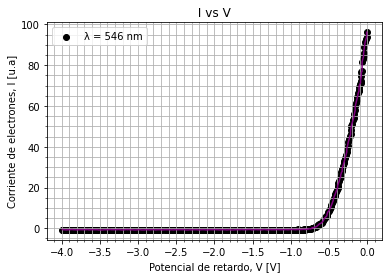

In [ ]:
valx1_546=df.loc[3:268,"546Vr [V]"]
valy1_546=df.loc[3:268,"546I [pA]"]
x1_546=valx1_546.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y1_546=valy1_546.values
plt.scatter(x1_546,y1_546,label="λ = 546 nm",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(x1_546, y1_546,color="purple")

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Intervalo de corriente 0')

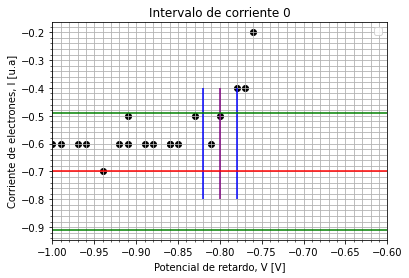

In [ ]:
valx2_546=df.loc[87:268,"546Vr [V]"] #[-1.99,-3.97]
valy2_546=df.loc[87:268,"546I [pA]"]
x2_546=valx2_546.values 
y2_546=valy2_546.values

xmin3 = -4
xmax3 = -0.6
ymin3 = -0.8
ymax3 = -0.4
#vlines
plt.vlines(x=-0.8, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-0.78, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-0.82, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-0.49, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.91, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_546,y2_546,color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")

plt.xlim([-1.0, -0.6])
#plt.ylim([-2, -1.0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
dev_546 = statistics.stdev(y2_546)
med_546 = statistics.median(y2_546)
print("La desviación estandar en el metodo 1 es: ", dev_546)
print("La media en el metodo 1 es: ", med_546)

medinf_546 = med_546 - (3*dev_546)
medsup_546 = med_546 + (3*dev_546)
print("El corte de 0 inferior es: ", medinf_546)
print("El corte de 0 superior es: ",medsup_546)

La desviación estandar en el metodo 1 es:  0.08203293968578472
La media en el metodo 1 es:  -0.7
El corte de 0 inferior es:  -0.946098819057354
El corte de 0 superior es:  -0.4539011809426458


###Metodo 2

Text(0.5, 1.0, 'Intervalo de corriente 0')

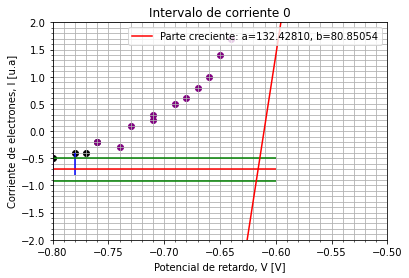

In [ ]:
#Parte CRECIENTE
val_546_x2=df.loc[3:87,"546Vr [V]"]
val_546_y2=df.loc[3:87,"546I [pA]"]

y3_546 = val_546_y2.values
x3_546 = val_546_x2.values

#y2_436,x2_436 son las parte de V0

xmin3 = -4
xmax3 = -0.6
ymin3 = -0.8
ymax3 = -0.4
#vlines
plt.vlines(x=-0.8, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-0.78, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-0.82, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-0.49, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.91, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_546,y2_546,color="black")
plt.scatter(x3_546,y3_546,color="purple")

plt.minorticks_on()
plt.grid(b=True,which="both")

#Regresión lineal
popt3_546, pcov = curve_fit(f1, x3_546, y3_546)
plt.plot(x3_546, f1(x3_546, *popt3_546), 'r-', label='Parte creciente: a=%5.5f, b=%5.5f' % tuple(popt3_546))

#ZOOM
plt.xlim([-0.8, -0.5])
plt.ylim([-2, 2])

plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
#Incertidumbre de los parametros
print(ERROR(x3_546,y3_546,popt3_546[0],popt3_546[1])) 
#Metodo 2
V0_2_inf = (popt3_546[1]+0.35)/popt3_546[0]
V0_2_sup = (popt3_546[1]+1.04)/popt3_546[0]
print("V0_2_inf= ", V0_2_inf)
print("V0_2_sup= ", V0_2_sup)
print("V0= ", (V0_2_sup+ V0_2_inf)/2)

(3.975291305611241, 1.56726391684384)
V0_2_inf=  0.6131670427605649
V0_2_sup=  0.6183774174276135
V0=  0.6157722300940892


###Metodo 3

In [ ]:
xnew546 = []
ynew546 = []
for i in range(265):
  if (x1_546[i] == x1_546[i +1]):
    continue
  f = (y1_546[i + 1] - y1_546[i])/(x1_546[i +1] - x1_546[i])
  ynew546.append(f)
  xnew546.append(x1_546[i])

Text(0.5, 1.0, 'Curva I')

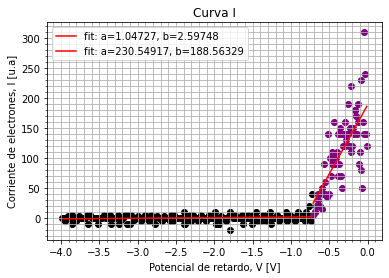

In [ ]:
xs_546 = 67
y_new546 = np.array(ynew546[xs_546:477])
x_new546 = np.array(xnew546[xs_546:477])
y3_new546 = np.array(ynew546[:xs_546])
x3_new546 = np.array(xnew546[:xs_546])
plt.scatter(x_new546,y_new546,color="black")
plt.scatter(x3_new546,y3_new546,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

popt_546_1, pcov = curve_fit(f1, x_new546, y_new546)
plt.plot(x_new546, f1(x_new546, *popt_546_1), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_546_1))

popt_546_2, pcov = curve_fit(f1, x3_new546, y3_new546)
plt.plot(x3_new546, f1(x3_new546, *popt_546_2), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_546_2))

#Zoom
#plt.xlim([-1.7, -1.0])
#plt.ylim([-10, 40])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Curva I")

In [ ]:
#Hallar V0
v0_546 = -(popt_546_2[1]-popt_546_1[1])/(popt_546_2[0]-popt_546_1[0])
print(v0_546)

-0.8103018668873047


In [ ]:
#Incertidumbre de los parametros
print(ERROR(x_new546,y_new546,popt_546_1[0],popt_546_1[1])) 
print(ERROR(x3_new546,y3_new546,popt_546_2[0],popt_546_2[1])) 


(0.3852946321188971, 0.9528872302221619)
(22.839006013098544, 9.397078424933818)


##578

###Metodo 1

Text(0.5, 1.0, ' I vs V ')

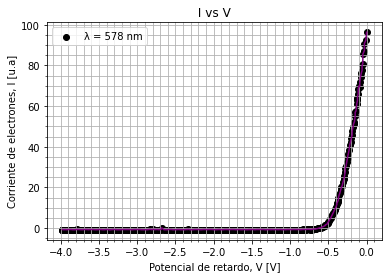

In [ ]:
valx1_578=df.loc[3:269,"578Vr [V]"]
valy1_578=df.loc[3:269,"578I [pA]"]
x1_578=valx1_578.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y1_578=valy1_578.values
plt.scatter(x1_578,y1_578,label="λ = 578 nm",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(x1_578, y1_578,color="purple")

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Intervalo de corriente 0')

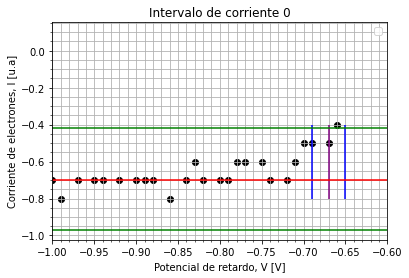

In [ ]:
valx2_578=df.loc[76:270,"578Vr [V]"] #[-1.99,-3.97]
valy2_578=df.loc[76:270,"578I [pA]"]
x2_578=valx2_578.values 
y2_578=valy2_578.values

xmin3 = -1
xmax3 = -0.6
ymin3 = -0.8
ymax3 = -0.4
#vlines
plt.vlines(x=-0.67, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-0.65, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-0.69, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-0.42, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.97, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_578,y2_578,color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")

plt.xlim([-1.0, -0.6])
#plt.ylim([-2, -1.0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
dev_578 = statistics.stdev(y2_578)
med_578 = statistics.median(y2_578)
print("La desviación estandar en el metodo 1 es: ", dev_578)
print("La media en el metodo 1 es: ", med_578)

medinf_578 = med_578 - (3*dev_578)
medsup_578 = med_578 + (3*dev_578)
print("El corte de 0 inferior es: ", medinf_578)
print("El corte de 0 superior es: ",medsup_578)


La desviación estandar en el metodo 1 es:  0.09010816773565965
La media en el metodo 1 es:  -0.7
El corte de 0 inferior es:  -0.9703245032069789
El corte de 0 superior es:  -0.42967549679302103


x = -0.67

###Metodo 2

Text(0.5, 1.0, 'Intervalo de corriente 0')

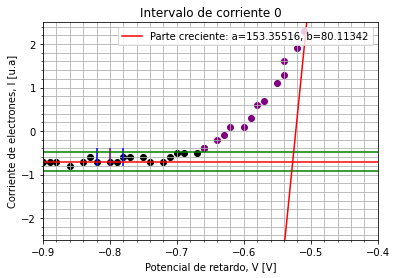

In [ ]:
#Parte CRECIENTE
val_578_x2=df.loc[3:76,"578Vr [V]"]
val_578_y2=df.loc[3:76,"578I [pA]"]

y3_578 = val_578_y2.values
x3_578 = val_578_x2.values

#y2_436,x2_436 son las parte de V0

xmin3 = -4
xmax3 = 0.0
ymin3 = -0.8
ymax3 = -0.4
#vlines
plt.vlines(x=-0.8, ymin=ymin3, ymax=ymax3, color='purple')
plt.vlines(x=-0.78, ymin=ymin3, ymax=ymax3, color='blue')
plt.vlines(x=-0.82, ymin=ymin3, ymax=ymax3, color='blue')
#hlines
plt.hlines(y=-0.7, xmin=xmin3, xmax=xmax3, color='red')
plt.hlines(y=-0.49, xmin=xmin3, xmax=xmax3, color='green')
plt.hlines(y=-0.91, xmin=xmin3, xmax=xmax3, color='green')

plt.scatter(x2_578,y2_578,color="black")
plt.scatter(x3_578,y3_578,color="purple")

plt.minorticks_on()
plt.grid(b=True,which="both")

#Regresión lineal
popt2_578, pcov = curve_fit(f1, x3_578, y3_578)
plt.plot(x3_578, f1(x3_578, *popt2_578), 'r-', label='Parte creciente: a=%5.5f, b=%5.5f' % tuple(popt2_578))

#ZOOM
plt.xlim([-0.9, -0.4])
plt.ylim([-2.5, 2.5])

plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Intervalo de corriente 0")

In [ ]:
#Incertidumbre de los parametros
print(ERROR(x3_578,y3_578,popt2_578[0],popt2_578[1])) 
#Método 2
V02_578_inf =  popt2_578[1] /(popt2_578[0]- medinf_578) 
V02_578_sup =  popt2_578[1] /(popt2_578[0]- medsup_578) 
print(V02_578_inf)
print(V02_578_sup)
print((V02_578_inf+V02_578_sup)/2)

(5.100140385413626, 1.7781140440464396)
0.519119840098816
0.5209448681244666
0.5200323541116413


###Metodo 3

In [ ]:
xnew578 = []
ynew578 = []
for i in range(266):
  if (x1_578[i] == x1_578[i +1]):
    continue
  f = (y1_578[i + 1] - y1_578[i])/(x1_578[i +1] - x1_578[i])
  ynew578.append(f)
  xnew578.append(x1_578[i])

Text(0.5, 1.0, 'Curva I')

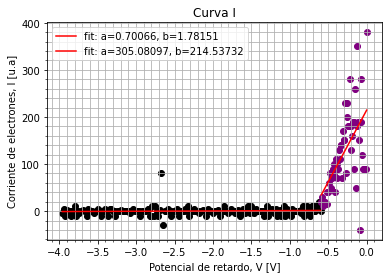

In [ ]:
xs_578 = 56
y_new578 = np.array(ynew578[xs_578:270])
x_new578 = np.array(xnew578[xs_578:270])
y3_new578 = np.array(ynew578[:xs_578])
x3_new578 = np.array(xnew578[:xs_578])
plt.scatter(x_new578,y_new578,color="black")
plt.scatter(x3_new578,y3_new578,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

popt_578_1, pcov = curve_fit(f1, x_new578, y_new578)
plt.plot(x_new578, f1(x_new578, *popt_578_1), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_578_1))

popt_578_2, pcov = curve_fit(f1, x3_new578, y3_new578)
plt.plot(x3_new578, f1(x3_new578, *popt_578_2), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt_578_2))

#Zoom
#plt.xlim([-1.7, -1.0])
#plt.ylim([-10, 40])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title("Curva I")

In [ ]:
#Hallar V0
v0_578 = -(popt_578_2[1]-popt_578_1[1])/(popt_578_2[0]-popt_578_1[0] )
print(v0_578)

-0.698980197883525


In [ ]:
popt_578_2[0]

314.7788652463068

In [ ]:
#Incertidumbre de los parametros
print(ERROR(x_new578,y_new578,popt_578_1[0],popt_578_1[1])) 
print(ERROR(x3_new578,y3_new578,popt_578_2[0],popt_578_2[1])) 

(0.5882833995699686, 1.4097130307138492)
(56.172802368053844, 18.503558379760694)


#Pruebas

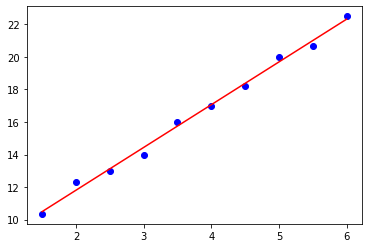

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

x = np.array([1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
y = np.array([10.35,12.3,13,14.0,16,17,18.2,20,20.7,22.5])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [ ]:
print(std_err)

0.06905900379754641


#Parte 2

### $\lambda$ = 365

In [ ]:
worksheet2=wb.worksheet('365 nm')
rows2 = worksheet2.get_all_values()
df2=pd.DataFrame(rows2)
titles=pd.DataFrame(rows2)
df2.columns = df2.iloc[1]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[2]
df2 = df2.iloc[2:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df2.head()

1,Vr1 [V],I1 [pA],Vr2 [V],I2 [pA],Vr3 [V],I3 [pA]
2,0.00,94.0,0.00,69.1,-0.02,49.7
3,0.00,93.9,-0.02,68.3,-0.04,48.9
4,-0.01,93.7,-0.04,65.9,-0.06,48.0
5,-0.04,90.6,-0.05,66.2,-0.08,47.2
6,-0.05,89.4,-0.07,63.7,-0.09,46.0


In [ ]:
nombres11=df2.columns.tolist()
for name in nombres11:
  df2[name]= pd.to_numeric(df2[name])

Text(0.5, 1.0, ' I vs V ')

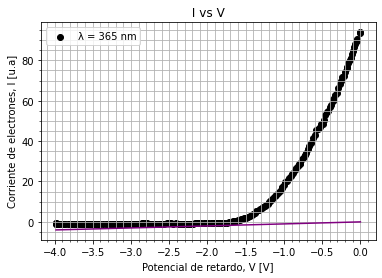

In [ ]:
vlx1_365=df2.loc[3:183,"Vr1 [V]"]
vly1_365=df2.loc[3:183,"I1 [pA]"]
xp_365_1=vlx1_365.values 
yp_365_1=vly1_365.values
plt.scatter(xp_365_1,yp_365_1,label="λ = 365 nm",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(xp_365_1, xp_365_1,color="purple")

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

In [ ]:
def met3(x7,y7,x8,y8): 
  for i in range(np.size(x7)-1):
    if (x7[i] == x7[i +1]):
      continue
    f = (y7[i + 1] - y7[i])/(x7[i +1] - x7[i])
    y8.append(f)
    x8.append(x7[i])
  return(x8,y8)

Text(0, 0.5, 'Corriente de electrones, I [u.a]')

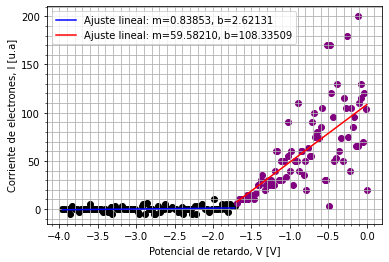

In [ ]:
xp_365_2 = []
yp_365_2 = []
xp_365_2, yp_365_2 = met3(xp_365_1,yp_365_1,xp_365_2, yp_365_2)
xss_365 = 86
yp_365_3 = np.array(yp_365_2[xss_365:np.size(xp_365_2)])
xp_365_3 = np.array(xp_365_2[xss_365:np.size(xp_365_2)])
yp_365_4 = np.array(yp_365_2[:xss_365])
xp_365_4 = np.array(xp_365_2[:xss_365])
plt.scatter(xp_365_3,yp_365_3,color="black")
plt.scatter(xp_365_4,yp_365_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_365_3, pcov = curve_fit(f1, xp_365_3, yp_365_3)
plt.plot(xp_365_3, f1(xp_365_3, *p_365_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_365_3))

p_365_4, pcov = curve_fit(f1, xp_365_4, yp_365_4)
plt.plot(xp_365_4, f1(xp_365_4, *p_365_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_365_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_365 = -(p_365_4[1]-p_365_3[1])/(p_365_4[0]-p_365_3[0] )
print(vpp_365)
#Incertidumbre de los parametros
print(ERROR(xp_365_3,yp_365_3,p_365_3[0],p_365_3[1])) 
print(ERROR(xp_365_4,yp_365_4,p_365_4[0],p_365_4[1])) 

-1.7995804010414223
(0.43992087783329303, 1.2698770422634171)
(6.865639525562911, 6.42213236578445)


SEGUNDO GRUPO DE DATOS


Text(0, 0.5, 'Corriente de electrones, I [u.a]')

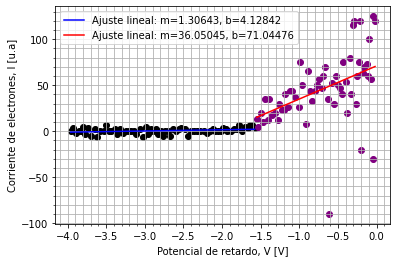

In [ ]:
#Datos iniciales
vlx1_365=df2.loc[3:132,"Vr2 [V]"]
vly1_365=df2.loc[3:132,"I2 [pA]"]
xp_365_1=vlx1_365.values 
yp_365_1=vly1_365.values
# 
xp_365_2 = []
yp_365_2 = []
xp_365_2, yp_365_2 = met3(xp_365_1,yp_365_1,xp_365_2, yp_365_2)
#
xss_365 = 60
yp_365_3 = np.array(yp_365_2[xss_365:np.size(xp_365_2)])
xp_365_3 = np.array(xp_365_2[xss_365:np.size(xp_365_2)])
yp_365_4 = np.array(yp_365_2[:xss_365])
xp_365_4 = np.array(xp_365_2[:xss_365])
plt.scatter(xp_365_3,yp_365_3,color="black")
plt.scatter(xp_365_4,yp_365_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_365_3, pcov = curve_fit(f1, xp_365_3, yp_365_3)
plt.plot(xp_365_3, f1(xp_365_3, *p_365_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_365_3))

p_365_4, pcov = curve_fit(f1, xp_365_4, yp_365_4)
plt.plot(xp_365_4, f1(xp_365_4, *p_365_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_365_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_365 = -(p_365_4[1]-p_365_3[1])/(p_365_4[0]-p_365_3[0] )
print(vpp_365)
#Incertidumbre de los parametros
print(ERROR(xp_365_3,yp_365_3,p_365_3[0],p_365_3[1])) 
print(ERROR(xp_365_4,yp_365_4,p_365_4[0],p_365_4[1])) 

-1.925981405573864
(0.46917542453789113, 1.32190895211669)
(9.269568629096842, 7.720276414506449)


Text(0, 0.5, 'Corriente de electrones, I [u.a]')

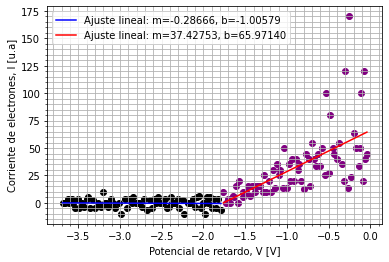

In [ ]:
#Datos iniciales
vlx1_365=df2.loc[3:153,"Vr3 [V]"]
vly1_365=df2.loc[3:153,"I3 [pA]"]
xp_365_1=vlx1_365.values 
yp_365_1=vly1_365.values
# 
xp_365_2 = []
yp_365_2 = []
xp_365_2, yp_365_2 = met3(xp_365_1,yp_365_1,xp_365_2, yp_365_2)
#
xss_365 = 74
yp_365_3 = np.array(yp_365_2[xss_365:np.size(xp_365_2)])
xp_365_3 = np.array(xp_365_2[xss_365:np.size(xp_365_2)])
yp_365_4 = np.array(yp_365_2[:xss_365])
xp_365_4 = np.array(xp_365_2[:xss_365])
plt.scatter(xp_365_3,yp_365_3,color="black")
plt.scatter(xp_365_4,yp_365_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_365_3, pcov = curve_fit(f1, xp_365_3, yp_365_3)
plt.plot(xp_365_3, f1(xp_365_3, *p_365_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_365_3))

p_365_4, pcov = curve_fit(f1, xp_365_4, yp_365_4)
plt.plot(xp_365_4, f1(xp_365_4, *p_365_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_365_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_365 = -(p_365_4[1]-p_365_3[1])/(p_365_4[0]-p_365_3[0] )
print(vpp_365)
#Incertidumbre de los parametros
print(ERROR(xp_365_3,yp_365_3,p_365_3[0],p_365_3[1])) 
print(ERROR(xp_365_4,yp_365_4,p_365_4[0],p_365_4[1])) 

-1.7759150244135273
(0.7626982332960625, 2.089635731122288)
(5.3432397256784725, 5.375239446659134)


## $\lambda$ = 405

In [ ]:
worksheet3=wb.worksheet('405 nm')
rows3 = worksheet3.get_all_values()
df3=pd.DataFrame(rows3)
titles=pd.DataFrame(rows3)
df3.columns = df3.iloc[1]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[2]
df3 = df3.iloc[2:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df3.head()

1,Vr1 [V],I1 [pA],Vr2 [V],I2 [pA],Vr3 [V],I3 [pA]
2,0.00,90.5,0.00,69.7,0.00,50.4
3,-0.02,89.4,0.00,69.8,0.00,50.5
4,-0.03,87.4,-0.02,68.8,0.00,50.2
5,-0.04,86.3,-0.04,67.2,-0.03,49.1
6,-0.05,85.1,-0.06,65.7,-0.05,47.8


In [ ]:
nombres_3=df3.columns.tolist()
for name in nombres_3:
  df3[name]= pd.to_numeric(df3[name])

Text(0, 0.5, 'Corriente de electrones, I [u.a]')

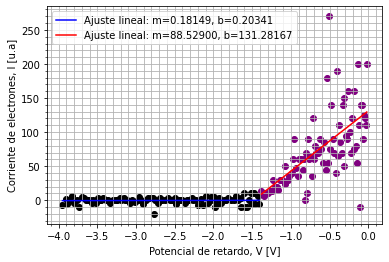

In [ ]:
#Datos iniciales
vlx1_405=df3.loc[3:183,"Vr1 [V]"]
vly1_405=df3.loc[3:183,"I1 [pA]"]
xp_405_1=vlx1_405.values 
yp_405_1=vly1_405.values
# 
xp_405_2 = []
yp_405_2 = []
xp_405_2, yp_405_2 = met3(xp_405_1,yp_405_1,xp_405_2, yp_405_2)
#
xss_405 = 81
yp_405_3 = np.array(yp_405_2[xss_405:np.size(xp_405_2)])
xp_405_3 = np.array(xp_405_2[xss_405:np.size(xp_405_2)])
yp_405_4 = np.array(yp_405_2[:xss_405])
xp_405_4 = np.array(xp_405_2[:xss_405])
plt.scatter(xp_405_3,yp_405_3,color="black")
plt.scatter(xp_405_4,yp_405_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_405_3, pcov = curve_fit(f1, xp_405_3, yp_405_3)
plt.plot(xp_405_3, f1(xp_405_3, *p_405_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_405_3))

p_405_4, pcov = curve_fit(f1, xp_405_4, yp_405_4)
plt.plot(xp_405_4, f1(xp_405_4, *p_405_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_405_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_405 = -(p_405_4[1]-p_405_3[1])/(p_405_4[0]-p_405_3[0] )
print(vpp_405)
#Incertidumbre de los parametros
print(ERROR(xp_405_3,yp_405_3,p_405_3[0],p_405_3[1])) 
print(ERROR(xp_405_4,yp_405_4,p_405_4[0],p_405_4[1])) 

-1.4836668542895415
(0.6217093817980173, 1.6940759722586483)
(11.372200605001781, 8.45942482853327)


Text(0, 0.5, 'Corriente de electrones, I [u.a]')

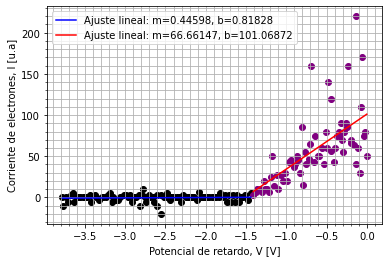

In [ ]:
#Datos iniciales
vlx1_405=df3.loc[3:163,"Vr2 [V]"]
vly1_405=df3.loc[3:163,"I2 [pA]"]
xp_405_1=vlx1_405.values 
yp_405_1=vly1_405.values
# 
xp_405_2 = []
yp_405_2 = []
xp_405_2, yp_405_2 = met3(xp_405_1,yp_405_1,xp_405_2, yp_405_2)
#
xss_405 = 67
yp_405_3 = np.array(yp_405_2[xss_405:np.size(xp_405_2)])
xp_405_3 = np.array(xp_405_2[xss_405:np.size(xp_405_2)])
yp_405_4 = np.array(yp_405_2[:xss_405])
xp_405_4 = np.array(xp_405_2[:xss_405])
plt.scatter(xp_405_3,yp_405_3,color="black")
plt.scatter(xp_405_4,yp_405_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_405_3, pcov = curve_fit(f1, xp_405_3, yp_405_3)
plt.plot(xp_405_3, f1(xp_405_3, *p_405_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_405_3))

p_405_4, pcov = curve_fit(f1, xp_405_4, yp_405_4)
plt.plot(xp_405_4, f1(xp_405_4, *p_405_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_405_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_405 = -(p_405_4[1]-p_405_3[1])/(p_405_4[0]-p_405_3[0] )
print(vpp_405)
#Incertidumbre de los parametros
print(ERROR(xp_405_3,yp_405_3,p_405_3[0],p_405_3[1])) 
print(ERROR(xp_405_4,yp_405_4,p_405_4[0],p_405_4[1])) 

-1.514002923101835
(0.6011135113837897, 1.6055944298436564)
(9.616515090277066, 7.283873623238419)


Text(0, 0.5, 'Corriente de electrones, I [u.a]')

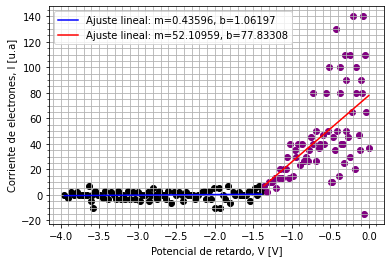

In [ ]:
#Datos iniciales
vlx1_405=df3.loc[3:159,"Vr3 [V]"]
vly1_405=df3.loc[3:159,"I3 [pA]"]
xp_405_1=vlx1_405.values 
yp_405_1=vly1_405.values
# 
xp_405_2 = []
yp_405_2 = []
xp_405_2, yp_405_2 = met3(xp_405_1,yp_405_1,xp_405_2, yp_405_2)
#
xss_405 = 69
yp_405_3 = np.array(yp_405_2[xss_405:np.size(xp_405_2)])
xp_405_3 = np.array(xp_405_2[xss_405:np.size(xp_405_2)])
yp_405_4 = np.array(yp_405_2[:xss_405])
xp_405_4 = np.array(xp_405_2[:xss_405])
plt.scatter(xp_405_3,yp_405_3,color="black")
plt.scatter(xp_405_4,yp_405_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_405_3, pcov = curve_fit(f1, xp_405_3, yp_405_3)
plt.plot(xp_405_3, f1(xp_405_3, *p_405_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_405_3))

p_405_4, pcov = curve_fit(f1, xp_405_4, yp_405_4)
plt.plot(xp_405_4, f1(xp_405_4, *p_405_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_405_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_405 = -(p_405_4[1]-p_405_3[1])/(p_405_4[0]-p_405_3[0] )
print(vpp_405)
#Incertidumbre de los parametros
print(ERROR(xp_405_3,yp_405_3,p_405_3[0],p_405_3[1])) 
print(ERROR(xp_405_4,yp_405_4,p_405_4[0],p_405_4[1])) 

-1.4856921370410772
(0.5022083381135231, 1.3676428005550667)
(8.992040120312065, 6.354977409770442)


## $\lambda= 436$

In [ ]:
worksheet4=wb.worksheet('436 nm')
rows4 = worksheet4.get_all_values()
df4=pd.DataFrame(rows4)
titles=pd.DataFrame(rows4)
df4.columns = df4.iloc[1]
titles=titles.iloc[2]
df4 = df4.iloc[2:]
df4.head()

1,Vr1 [V],I1 [pA],Vr2 [V],I2 [pA],Vr3 [V],I3 [pA]
2,0.00,90.9,0.00,69.8,0.00,49.6
3,0.00,89.4,-0.02,70.0,0.00,49.1
4,-0.03,87.3,-0.06,65.3,-0.02,48.0
5,-0.05,82.6,-0.07,63.0,-0.03,47.1
6,-0.07,80.8,-0.09,60.9,-0.05,45.3


In [ ]:
nombres_4=df4.columns.tolist()
for name in nombres_4:
  df4[name]= pd.to_numeric(df4[name])

Text(0, 0.5, 'Corriente de electrones, I [u.a]')

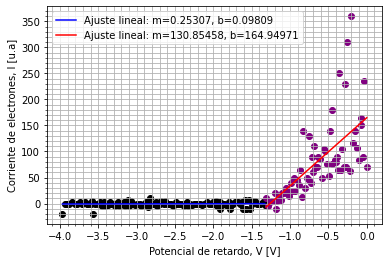

In [ ]:
#Datos iniciales
vlx1_436=df4.loc[3:176,"Vr1 [V]"]
vly1_436=df4.loc[3:176,"I1 [pA]"]
xp_436_1=vlx1_436.values 
yp_436_1=vly1_436.values
# 
xp_436_2 = []
yp_436_2 = []
xp_436_2, yp_436_2 = met3(xp_436_1,yp_436_1,xp_436_2, yp_436_2)
#
xss_436 =67
yp_436_3 = np.array(yp_436_2[xss_436:np.size(xp_436_2)])
xp_436_3 = np.array(xp_436_2[xss_436:np.size(xp_436_2)])
yp_436_4 = np.array(yp_436_2[:xss_436])
xp_436_4 = np.array(xp_436_2[:xss_436])
plt.scatter(xp_436_3,yp_436_3,color="black")
plt.scatter(xp_436_4,yp_436_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_436_3, pcov = curve_fit(f1, xp_436_3, yp_436_3)
plt.plot(xp_436_3, f1(xp_436_3, *p_436_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_436_3))

p_436_4, pcov = curve_fit(f1, xp_436_4, yp_436_4)
plt.plot(xp_436_4, f1(xp_436_4, *p_436_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_436_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

In [ ]:
#Hallar V0
vpp_436 = -(p_436_4[1]-p_436_3[1])/(p_436_4[0]-p_436_3[0] )
print(vpp_436)
#Incertidumbre de los parametros
print(ERROR(xp_436_3,yp_436_3,p_436_3[0],p_436_3[1])) 
print(ERROR(xp_436_4,yp_436_4,p_436_4[0],p_436_4[1])) 

-1.2622489938533727
(0.5498838448119724, 1.476851403893032)
(17.516134071120383, 12.993379250209687)


Valor de V_0:  -1.2967266332887228
(0.3594399891020063, 0.9885668398686516)
(8.491732933082009, 6.776578974155669)


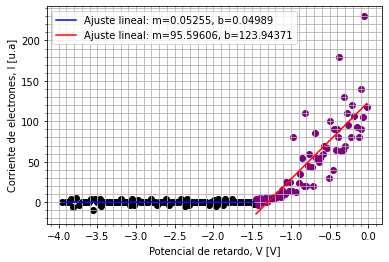

In [ ]:
#Datos iniciales
vlx1_436=df4.loc[3:149,"Vr2 [V]"]
vly1_436=df4.loc[3:149,"I2 [pA]"]
xp_436_1=vlx1_436.values 
yp_436_1=vly1_436.values
# 
xp_436_2 = []
yp_436_2 = []
xp_436_2, yp_436_2 = met3(xp_436_1,yp_436_1,xp_436_2, yp_436_2)
#
xss_436 =62
yp_436_3 = np.array(yp_436_2[xss_436:np.size(xp_436_2)])
xp_436_3 = np.array(xp_436_2[xss_436:np.size(xp_436_2)])
yp_436_4 = np.array(yp_436_2[:xss_436])
xp_436_4 = np.array(xp_436_2[:xss_436])
plt.scatter(xp_436_3,yp_436_3,color="black")
plt.scatter(xp_436_4,yp_436_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_436_3, pcov = curve_fit(f1, xp_436_3, yp_436_3)
plt.plot(xp_436_3, f1(xp_436_3, *p_436_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_436_3))

p_436_4, pcov = curve_fit(f1, xp_436_4, yp_436_4)
plt.plot(xp_436_4, f1(xp_436_4, *p_436_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_436_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_436 = -(p_436_4[1]-p_436_3[1])/(p_436_4[0]-p_436_3[0] )
print("Valor de V_0: ",vpp_436)
#Incertidumbre de los parametros
print(ERROR(xp_436_3,yp_436_3,p_436_3[0],p_436_3[1])) 
print(ERROR(xp_436_4,yp_436_4,p_436_4[0],p_436_4[1])) 

Valor de V_0:  -1.268550644865386
(0.41181200086140574, 1.1274308304569047)
(5.931716301503897, 4.412703710046731)


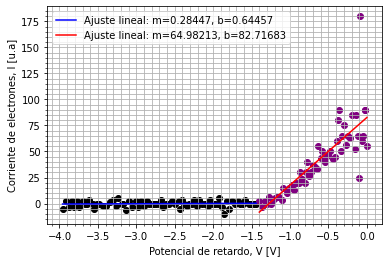

In [ ]:
#Datos iniciales
vlx1_436=df4.loc[3:134,"Vr3 [V]"]
vly1_436=df4.loc[3:134,"I3 [pA]"]
xp_436_1=vlx1_436.values 
yp_436_1=vly1_436.values
# 
xp_436_2 = []
yp_436_2 = []
xp_436_2, yp_436_2 = met3(xp_436_1,yp_436_1,xp_436_2, yp_436_2)
#
xss_436 =57
yp_436_3 = np.array(yp_436_2[xss_436:np.size(xp_436_2)])
xp_436_3 = np.array(xp_436_2[xss_436:np.size(xp_436_2)])
yp_436_4 = np.array(yp_436_2[:xss_436])
xp_436_4 = np.array(xp_436_2[:xss_436])
plt.scatter(xp_436_3,yp_436_3,color="black")
plt.scatter(xp_436_4,yp_436_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_436_3, pcov = curve_fit(f1, xp_436_3, yp_436_3)
plt.plot(xp_436_3, f1(xp_436_3, *p_436_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_436_3))

p_436_4, pcov = curve_fit(f1, xp_436_4, yp_436_4)
plt.plot(xp_436_4, f1(xp_436_4, *p_436_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_436_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_436 = -(p_436_4[1]-p_436_3[1])/(p_436_4[0]-p_436_3[0] )
print("Valor de V_0: ",vpp_436)
#Incertidumbre de los parametros
print(ERROR(xp_436_3,yp_436_3,p_436_3[0],p_436_3[1])) 
print(ERROR(xp_436_4,yp_436_4,p_436_4[0],p_436_4[1])) 

## $\lambda= 546$

In [ ]:
worksheet5=wb.worksheet('546 nm')
rows5 = worksheet5.get_all_values()
df5=pd.DataFrame(rows5)
titles=pd.DataFrame(rows5)
df5.columns = df5.iloc[1]
titles=titles.iloc[2]
df5 = df5.iloc[2:]
df5.head()

1,Vr1 [V],I1 [pA],Vr2 [V],I2 [pA],Vr3 [V],I3 [pA]
2,0.00,91.4,0.00,67.6,0.00,52.3
3,-0.01,92.0,0.00,68.7,0.00,51.4
4,-0.06,78.5,0.00,67.9,-0.01,51.5
5,-0.07,75.4,-0.03,64.9,-0.02,49.8
6,-0.09,71.6,-0.05,59.7,-0.03,49.4


In [ ]:
nombres_5=df5.columns.tolist()
for name in nombres_5:
  df5[name]= pd.to_numeric(df5[name])

Valor de V_0:  -0.7751021931180729
(0.5451400754670068, 1.2957171656444464)
(38.40325616416576, 18.851648282442824)


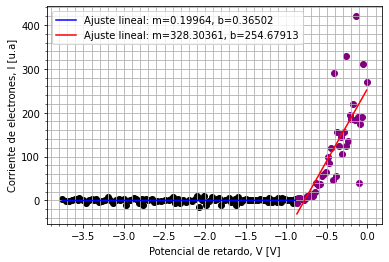

In [ ]:
#Datos iniciales
vlx1_546=df5.loc[3:139,"Vr1 [V]"]
vly1_546=df5.loc[3:139,"I1 [pA]"]
xp_546_1=vlx1_546.values 
yp_546_1=vly1_546.values
# 
xp_546_2 = []
yp_546_2 = []
xp_546_2, yp_546_2 = met3(xp_546_1,yp_546_1,xp_546_2, yp_546_2)
#
xss_546 =43
yp_546_3 = np.array(yp_546_2[xss_546:np.size(xp_546_2)])
xp_546_3 = np.array(xp_546_2[xss_546:np.size(xp_546_2)])
yp_546_4 = np.array(yp_546_2[:xss_546])
xp_546_4 = np.array(xp_546_2[:xss_546])
plt.scatter(xp_546_3,yp_546_3,color="black")
plt.scatter(xp_546_4,yp_546_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_546_3, pcov = curve_fit(f1, xp_546_3, yp_546_3)
plt.plot(xp_546_3, f1(xp_546_3, *p_546_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_546_3))

p_546_4, pcov = curve_fit(f1, xp_546_4, yp_546_4)
plt.plot(xp_546_4, f1(xp_546_4, *p_546_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_546_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_546 = -(p_546_4[1]-p_546_3[1])/(p_546_4[0]-p_546_3[0] )
print("Valor de V_0: ",vpp_546)
#Incertidumbre de los parametros
print(ERROR(xp_546_3,yp_546_3,p_546_3[0],p_546_3[1])) 
print(ERROR(xp_546_4,yp_546_4,p_546_4[0],p_546_4[1])) 

Valor de V_0:  -0.8385790153606713
(0.8611204376865391, 2.2075677186040443)
(18.76088837591579, 10.029620758153866)


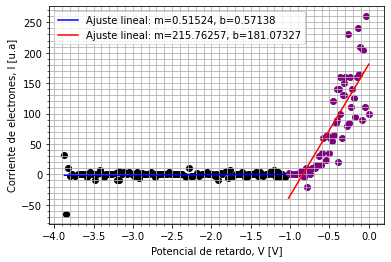

In [ ]:
#Datos iniciales
vlx1_546=df5.loc[3:164,"Vr2 [V]"]
vly1_546=df5.loc[3:164,"I2 [pA]"]
xp_546_1=vlx1_546.values 
yp_546_1=vly1_546.values
# 
xp_546_2 = []
yp_546_2 = []
xp_546_2, yp_546_2 = met3(xp_546_1,yp_546_1,xp_546_2, yp_546_2)
#
xss_546 =58
yp_546_3 = np.array(yp_546_2[xss_546:np.size(xp_546_2)])
xp_546_3 = np.array(xp_546_2[xss_546:np.size(xp_546_2)])
yp_546_4 = np.array(yp_546_2[:xss_546])
xp_546_4 = np.array(xp_546_2[:xss_546])
plt.scatter(xp_546_3,yp_546_3,color="black")
plt.scatter(xp_546_4,yp_546_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_546_3, pcov = curve_fit(f1, xp_546_3, yp_546_3)
plt.plot(xp_546_3, f1(xp_546_3, *p_546_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_546_3))

p_546_4, pcov = curve_fit(f1, xp_546_4, yp_546_4)
plt.plot(xp_546_4, f1(xp_546_4, *p_546_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_546_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_546 = -(p_546_4[1]-p_546_3[1])/(p_546_4[0]-p_546_3[0] )
print("Valor de V_0: ",vpp_546)
#Incertidumbre de los parametros
print(ERROR(xp_546_3,yp_546_3,p_546_3[0],p_546_3[1])) 
print(ERROR(xp_546_4,yp_546_4,p_546_4[0],p_546_4[1])) 

Valor de V_0:  -0.7820614030371736
(0.9555044779857579, 1.584096579508678)
(30.470979160033682, 12.960885266395975)


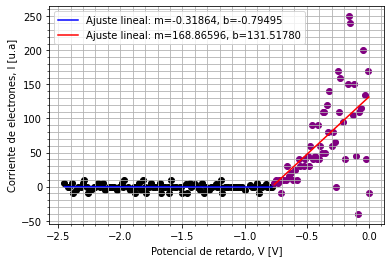

In [ ]:
#Datos iniciales
vlx1_546=df5.loc[3:164,"Vr3 [V]"]
vly1_546=df5.loc[3:164,"I3 [pA]"]
xp_546_1=vlx1_546.values 
yp_546_1=vly1_546.values
# 
xp_546_2 = []
yp_546_2 = []
xp_546_2, yp_546_2 = met3(xp_546_1,yp_546_1,xp_546_2, yp_546_2)
#
xss_546 =58
yp_546_3 = np.array(yp_546_2[xss_546:np.size(xp_546_2)])
xp_546_3 = np.array(xp_546_2[xss_546:np.size(xp_546_2)])
yp_546_4 = np.array(yp_546_2[:xss_546])
xp_546_4 = np.array(xp_546_2[:xss_546])
plt.scatter(xp_546_3,yp_546_3,color="black")
plt.scatter(xp_546_4,yp_546_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_546_3, pcov = curve_fit(f1, xp_546_3, yp_546_3)
plt.plot(xp_546_3, f1(xp_546_3, *p_546_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_546_3))

p_546_4, pcov = curve_fit(f1, xp_546_4, yp_546_4)
plt.plot(xp_546_4, f1(xp_546_4, *p_546_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_546_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_546 = -(p_546_4[1]-p_546_3[1])/(p_546_4[0]-p_546_3[0] )
print("Valor de V_0: ",vpp_546)
#Incertidumbre de los parametros
print(ERROR(xp_546_3,yp_546_3,p_546_3[0],p_546_3[1])) 
print(ERROR(xp_546_4,yp_546_4,p_546_4[0],p_546_4[1])) 

## $\lambda= 578$



In [ ]:
worksheet6=wb.worksheet('578 nm')
rows6 = worksheet6.get_all_values()
df6=pd.DataFrame(rows6)
titles=pd.DataFrame(rows6)
df6.columns = df6.iloc[1]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[2]
df6 = df6.iloc[2:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df6.head()

1,Vr1 [V],I1 [pA],Vr2 [V],I2 [pA],Vr3 [V],I3 [pA]
2,0.00,91.0,0.00,67.7,0.00,53.2
3,0.00,91.2,0.00,67.3,0.00,53.9
4,-0.01,89.6,-0.03,62.6,-0.02,50.8
5,-0.04,84.2,-0.04,57.8,-0.04,48.4
6,-0.05,79.2,-0.06,55.1,-0.06,45.7


In [ ]:
nombres_6=df6.columns.tolist()
for name in nombres_6:
  df6[name]= pd.to_numeric(df6[name])

Text(0.5, 1.0, ' I vs V ')

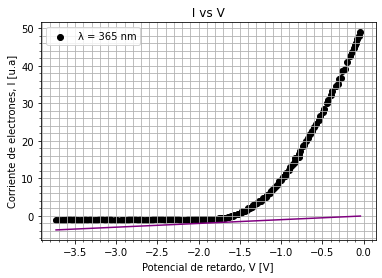

In [ ]:
vlx1_578=df6.loc[3:209,"Vr1 [V]"]
vly1_578=df6.loc[3:209,"I1 [pA]"]
xp_578_1=vlx1_578.values 
yp_578_1=vly1_578.values
plt.scatter(xp_365_1,yp_365_1,label="λ = 365 nm",color="black")
plt.minorticks_on()
plt.grid(b=True,which="both")
plt.plot(xp_365_1, xp_365_1,color="purple")

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
plt.title(" I vs V ")

Valor de V_0:  -0.6197274752128906
(0.47255641647222646, 1.1602053051497827)
(63.56837143101537, 23.68686097249776)


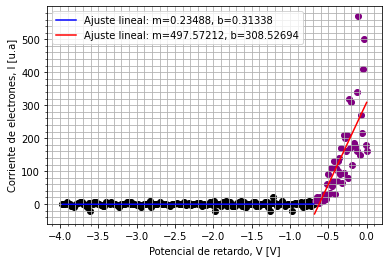

In [ ]:
#Datos iniciales
vlx1_578=df6.loc[3:209,"Vr1 [V]"]
vly1_578=df6.loc[3:209,"I1 [pA]"]
xp_578_1=vlx1_578.values 
yp_578_1=vly1_578.values
# 
xp_578_2 = []
yp_578_2 = []
xp_578_2, yp_578_2 = met3(xp_578_1,yp_578_1,xp_578_2, yp_578_2)
#
xss_578 =48
yp_578_3 = np.array(yp_578_2[xss_578:np.size(xp_578_2)])
xp_578_3 = np.array(xp_578_2[xss_578:np.size(xp_578_2)])
yp_578_4 = np.array(yp_578_2[:xss_578])
xp_578_4 = np.array(xp_578_2[:xss_578])
plt.scatter(xp_578_3,yp_578_3,color="black")
plt.scatter(xp_578_4,yp_578_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_578_3, pcov = curve_fit(f1, xp_578_3, yp_578_3)
plt.plot(xp_578_3, f1(xp_578_3, *p_578_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_578_3))

p_578_4, pcov = curve_fit(f1, xp_578_4, yp_578_4)
plt.plot(xp_578_4, f1(xp_578_4, *p_578_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_578_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_578 = -(p_578_4[1]-p_578_3[1])/(p_578_4[0]-p_578_3[0] )
print("Valor de V_0: ",vpp_578)
#Incertidumbre de los parametros
print(ERROR(xp_578_3,yp_578_3,p_578_3[0],p_578_3[1])) 
print(ERROR(xp_578_4,yp_578_4,p_578_4[0],p_578_4[1])) 

Valor de V_0:  -0.6257954136053061
(0.3121355206290712, 0.7569724470655145)
(58.643904756946, 20.057948135918295)


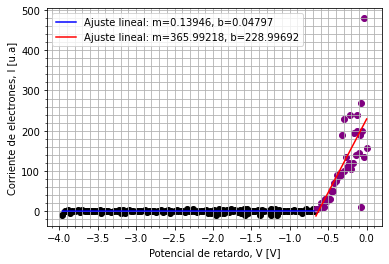

In [ ]:
#Datos iniciales
vlx1_578=df6.loc[3:163,"Vr2 [V]"]
vly1_578=df6.loc[3:163,"I2 [pA]"]
xp_578_1=vlx1_578.values 
yp_578_1=vly1_578.values
# 
xp_578_2 = []
yp_578_2 = []
xp_578_2, yp_578_2 = met3(xp_578_1,yp_578_1,xp_578_2, yp_578_2)
#
xss_578 =38
yp_578_3 = np.array(yp_578_2[xss_578:np.size(xp_578_2)])
xp_578_3 = np.array(xp_578_2[xss_578:np.size(xp_578_2)])
yp_578_4 = np.array(yp_578_2[:xss_578])
xp_578_4 = np.array(xp_578_2[:xss_578])
plt.scatter(xp_578_3,yp_578_3,color="black")
plt.scatter(xp_578_4,yp_578_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_578_3, pcov = curve_fit(f1, xp_578_3, yp_578_3)
plt.plot(xp_578_3, f1(xp_578_3, *p_578_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_578_3))

p_578_4, pcov = curve_fit(f1, xp_578_4, yp_578_4)
plt.plot(xp_578_4, f1(xp_578_4, *p_578_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_578_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_578 = -(p_578_4[1]-p_578_3[1])/(p_578_4[0]-p_578_3[0] )
print("Valor de V_0: ",vpp_578)
#Incertidumbre de los parametros
print(ERROR(xp_578_3,yp_578_3,p_578_3[0],p_578_3[1])) 
print(ERROR(xp_578_4,yp_578_4,p_578_4[0],p_578_4[1])) 

Valor de V_0:  -0.5952960414316181
(0.33266524305403716, 0.7891387828451896)
(51.170267617339064, 16.539804553873807)


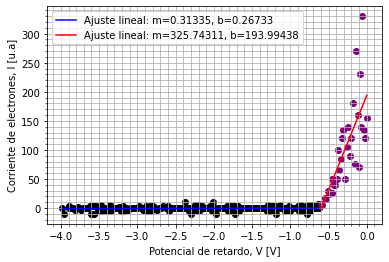

In [ ]:
#Datos iniciales
vlx1_578=df6.loc[3:179,"Vr3 [V]"]
vly1_578=df6.loc[3:179,"I3 [pA]"]
xp_578_1=vlx1_578.values 
yp_578_1=vly1_578.values
# 
xp_578_2 = []
yp_578_2 = []
xp_578_2, yp_578_2 = met3(xp_578_1,yp_578_1,xp_578_2, yp_578_2)
#
xss_578 =32
yp_578_3 = np.array(yp_578_2[xss_578:np.size(xp_578_2)])
xp_578_3 = np.array(xp_578_2[xss_578:np.size(xp_578_2)])
yp_578_4 = np.array(yp_578_2[:xss_578])
xp_578_4 = np.array(xp_578_2[:xss_578])
plt.scatter(xp_578_3,yp_578_3,color="black")
plt.scatter(xp_578_4,yp_578_4,color="purple")
plt.minorticks_on()
plt.grid(b=True,which="both")

p_578_3, pcov = curve_fit(f1, xp_578_3, yp_578_3)
plt.plot(xp_578_3, f1(xp_578_3, *p_578_3), 'b-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_578_3))

p_578_4, pcov = curve_fit(f1, xp_578_4, yp_578_4)
plt.plot(xp_578_4, f1(xp_578_4, *p_578_4), 'r-', label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_578_4))

#Zoom
#plt.xlim([-1.0, -0.5])
#plt.ylim([-20, 100])

plt.grid(b=True,which="both")
plt.legend(loc="upper left")
plt.xlabel("Potencial de retardo, V [V]")
plt.ylabel("Corriente de electrones, I [u.a]")
#plt.title("Curva I")

#Hallar V0
vpp_578 = -(p_578_4[1]-p_578_3[1])/(p_578_4[0]-p_578_3[0] )
print("Valor de V_0: ",vpp_578)
#Incertidumbre de los parametros
print(ERROR(xp_578_3,yp_578_3,p_578_3[0],p_578_3[1])) 
print(ERROR(xp_578_4,yp_578_4,p_578_4[0],p_578_4[1])) 